<a href="https://colab.research.google.com/github/prakashpoudyal/All-CSV-ML-Data-Files-Download/blob/master/USWork_June5_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bert-for-tf2
!pip install sentencepiece

In [2]:
#Load the Pandas Libraries with alias 'pd'
import pandas as pd

data=pd.read_csv('/content/caselawv3.csv',error_bad_lines=True, encoding='latin1')
#data=pd.read_csv('/content/sampleTry.csv',error_bad_lines=True, encoding='latin1')
data.head()

,ArgNonArg,Part,Code,Sentence
0,0,Empty,Empty,The Examining Attorney has preliminarily refus...
1,0,Empty,Empty,Applicant respectfully requests that the Exami...
2,0,Empty,Empty,"As discussed more fully below"","" confusion bet..."
3,1,PartA,MR157,"First"","" Applicant's and Green Bay's long-stan..."
4,1,PartA,MR157,"Importantly"","" in 1983 Applicant and Green Bay..."


In [0]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert

In [4]:
data.shape

(142, 4)

In [16]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-06-05 12:40:24--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-06-05 12:40:24--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-06-05 12:40:24--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [17]:
from zipfile import ZipFile
file_name_glove='/content/glove.6B.zip'

with ZipFile(file_name_glove,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
!mkdir glove_folder

mkdir: cannot create directory ‘glove_folder’: File exists


In [0]:
!mv glove.* glove_folder/ 

In [0]:
!cd glove_folder

In [19]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [20]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten,Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam 
print(tf.__version__)

2.2.0


In [0]:
caselaw =pd.read_csv('/content/caselawv3.csv',encoding='latin1')

In [22]:
caselaw.isnull().values.any()

False

In [23]:
caselaw.shape

(142, 4)

In [24]:
caselaw.drop(columns=['Part','Code'])

,ArgNonArg,Sentence
0,0,The Examining Attorney has preliminarily refus...
1,0,Applicant respectfully requests that the Exami...
2,0,"As discussed more fully below"","" confusion bet..."
3,1,"First"","" Applicant's and Green Bay's long-stan..."
4,1,"Importantly"","" in 1983 Applicant and Green Bay..."
...,...,...
137,1,"On the amended drawing"","" the color red appear..."
138,0,Applicant has submitted amended identification...
139,0,Applicant believes that the application is now...
140,0,"Therefore"","" Applicant respectfully requests t..."


### **`Classification of Argument vs NonArgument`**

In [25]:
caselaw.head()

,ArgNonArg,Part,Code,Sentence
0,0,Empty,Empty,The Examining Attorney has preliminarily refus...
1,0,Empty,Empty,Applicant respectfully requests that the Exami...
2,0,Empty,Empty,"As discussed more fully below"","" confusion bet..."
3,1,PartA,MR157,"First"","" Applicant's and Green Bay's long-stan..."
4,1,PartA,MR157,"Importantly"","" in 1983 Applicant and Green Bay..."


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


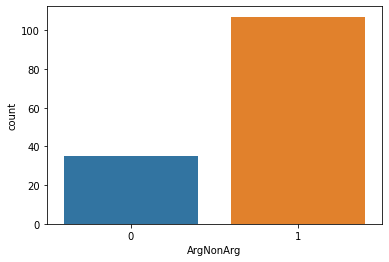

In [26]:
import seaborn as sns
sns.countplot(x='ArgNonArg', data=caselaw)

In [0]:
def preprocess_text(sen):
  sentence=remove_tags(sen)
  sentence=re.sub('[^a-zA-Z]',' ',sentence)
  sentence=re.sub(r"\s+[a-zA-Z]\s+", ' ',sentence)
  sentence=re.sub(r'\s+',' ', sentence)
  return sentence

In [0]:
TAG_RE=re.compile(r'<[^>]+>')

def remove_tags(caselaw):
  return TAG_RE.sub(' ',caselaw)

In [0]:
X=[]
sentences=list(caselaw['Sentence'])
for sen in sentences:
  X.append(preprocess_text(sen))

In [30]:
X

['The Examining Attorney has preliminarily refused registration of Applicant Mark under Section of the Lanham Act on the grounds that Applicant Mark when used on or in connection with the identified soods is likely to be confused with two football helmet design marks that are the subjects of S Registration No and S Registration No the Cited Marks for goods and services in various classes which are owned by Green Bay Packers Inc Lombardi Ave Green Bay Wisconsin Green Bay ',
 'Applicant respectfully requests that the Examining Attorney reconsider his preliminary conclusions regarding likelihood of confusion based on similarity of the marks and or relatedness of goods ',
 'As discussed more fully below confusion between Applicant Mark and the Cited Marks is not likely for number ofreasons ',
 'First Applicant and Green Bay long standing concurrent use of one version of their respective marks for more than years and use of modernized versions of their respective marks for more than years f

In [0]:
z=caselaw['ArgNonArg']

In [0]:
a=caselaw['ArgNonArg']
a=np.array(list(map(lambda x: 1 if x==1 else 0, a)))

In [33]:
a

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [0]:
X_train,X_test, y_train,y_test=train_test_split(X,a,test_size=0.20, random_state=42)

In [0]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

In [0]:
vocab_size=len(tokenizer.word_index) + 1
maxlen=100
X_train=pad_sequences(X_train,padding='post',maxlen=maxlen)
X_test=pad_sequences(X_test, padding='post', maxlen=maxlen)

In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/glove_folder/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [0]:
embedding_matrix=zeros((vocab_size,100))
for word,index in tokenizer.word_index.items():
  embedding_vector=embeddings_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index]=embedding_vector

In [0]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [0]:
model=Sequential()
embedding_layer=Embedding(vocab_size,100, weights=[embedding_matrix], input_length=maxlen,trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

In [48]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          90200     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10001     
Total params: 100,201
Trainable params: 10,001
Non-trainable params: 90,200
_________________________________________________________________
None


In [49]:
history = model.fit(X_train, y_train, batch_size=1, epochs=6, verbose=1, validation_split=0.2)

Train on 90 samples, validate on 23 samples
Epoch 1/6
90/90 [==============================] - 0s 2ms/step - loss: 0.7117 - acc: 0.6222 - val_loss: 0.4144 - val_acc: 0.8261
Epoch 2/6
90/90 [==============================] - 0s 1ms/step - loss: 0.3177 - acc: 0.9000 - val_loss: 0.3589 - val_acc: 0.8261
Epoch 3/6
90/90 [==============================] - 0s 1ms/step - loss: 0.2200 - acc: 0.9889 - val_loss: 0.3707 - val_acc: 0.8261
Epoch 4/6
90/90 [==============================] - 0s 1ms/step - loss: 0.1705 - acc: 0.9778 - val_loss: 0.3786 - val_acc: 0.8261
Epoch 5/6
90/90 [==============================] - 0s 1ms/step - loss: 0.1319 - acc: 0.9889 - val_loss: 0.4073 - val_acc: 0.8261
Epoch 6/6
90/90 [==============================] - 0s 1ms/step - loss: 0.1055 - acc: 0.9889 - val_loss: 0.4149 - val_acc: 0.8261


In [50]:
score = model.evaluate(X_test, y_test, verbose=1)

29/29 [==============================] - 0s 1ms/step


In [51]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.711549699306488
Test Accuracy: 0.7931034564971924


In [0]:
y_pred=model.predict_classes(X_test)

In [53]:
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [54]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1])

In [55]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 0s 107us/step


[0.711549699306488, 0.7931034564971924]

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [58]:
confusion_matrix(y_test,y_pred)

array([[ 1,  3],
       [ 3, 22]])

In [0]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.88      0.88      0.88        25

    accuracy                           0.79        29
   macro avg       0.56      0.56      0.56        29
weighted avg       0.79      0.79      0.79        29



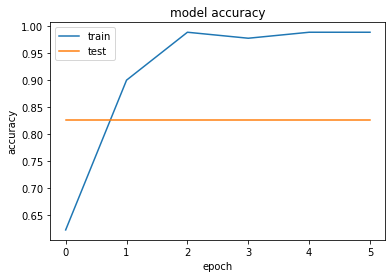

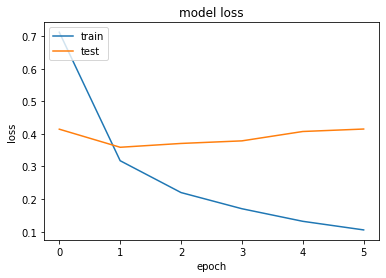

In [61]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

### **Text Classification with a Convolutional Neural Network**

In [0]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [0]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [64]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          90200     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 154,457
Trainable params: 64,257
Non-trainable params: 90,200
_________________________________________________________________
None


In [65]:
history = model.fit(X_train, y_train, batch_size=10, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 90 samples, validate on 23 samples
Epoch 1/6
90/90 [==============================] - 0s 3ms/step - loss: 0.6294 - acc: 0.6556 - val_loss: 0.4902 - val_acc: 0.7826
Epoch 2/6
90/90 [==============================] - 0s 1ms/step - loss: 0.3346 - acc: 0.8556 - val_loss: 0.5959 - val_acc: 0.7826
Epoch 3/6
90/90 [==============================] - 0s 1ms/step - loss: 0.2748 - acc: 0.9556 - val_loss: 0.4459 - val_acc: 0.7826
Epoch 4/6
90/90 [==============================] - 0s 1ms/step - loss: 0.1822 - acc: 0.9778 - val_loss: 0.4895 - val_acc: 0.8696
Epoch 5/6
90/90 [==============================] - 0s 1ms/step - loss: 0.1333 - acc: 1.0000 - val_loss: 0.4086 - val_acc: 0.7826
Epoch 6/6
29/29 [==============================] - 0s 348us/step


In [66]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5295665860176086
Test Accuracy: 0.8275862336158752


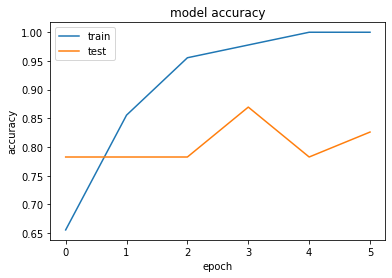

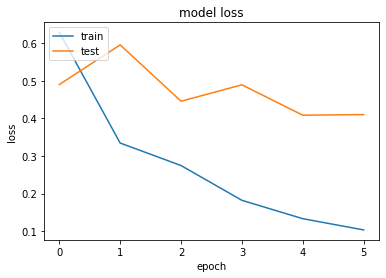

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.88      0.88      0.88        25

    accuracy                           0.79        29
   macro avg       0.56      0.56      0.56        29
weighted avg       0.79      0.79      0.79        29



### **Text Classification with Recurrent Neural Network (LSTM)**



In [0]:
from keras.layers.recurrent import LSTM

In [0]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [71]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          90200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 207,577
Trainable params: 117,377
Non-trainable params: 90,200
_________________________________________________________________
None


In [72]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 90 samples, validate on 23 samples
Epoch 1/6
90/90 [==============================] - 1s 10ms/step - loss: 0.6918 - acc: 0.5333 - val_loss: 0.6784 - val_acc: 0.7826
Epoch 2/6
90/90 [==============================] - 0s 4ms/step - loss: 0.6849 - acc: 0.7111 - val_loss: 0.6601 - val_acc: 0.7826
Epoch 3/6
90/90 [==============================] - 0s 4ms/step - loss: 0.6773 - acc: 0.7111 - val_loss: 0.6452 - val_acc: 0.7826
Epoch 4/6
90/90 [==============================] - 0s 4ms/step - loss: 0.6714 - acc: 0.7111 - val_loss: 0.6304 - val_acc: 0.7826
Epoch 5/6
90/90 [==============================] - 0s 3ms/step - loss: 0.6655 - acc: 0.7111 - val_loss: 0.6147 - val_acc: 0.7826
Epoch 6/6
29/29 [==============================] - 0s 1ms/step


In [73]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6382095217704773
Test Accuracy: 0.8620689511299133


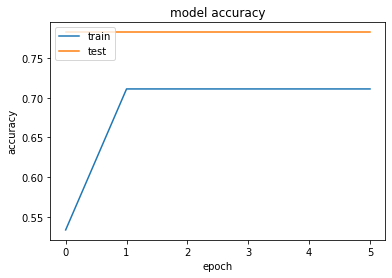

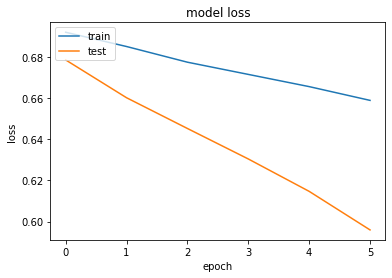

In [74]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Precision, recall and F-measure by using LSTM ![alt text](https://)

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.88      0.88      0.88        25

    accuracy                           0.79        29
   macro avg       0.56      0.56      0.56        29
weighted avg       0.79      0.79      0.79        29



### **[By Using BERT](https://)**

In [0]:

reviews = []
sentences=list(caselaw['Sentence'])
for sen in sentences:
  reviews.append(preprocess_text(sen))

In [77]:
reviews

['The Examining Attorney has preliminarily refused registration of Applicant Mark under Section of the Lanham Act on the grounds that Applicant Mark when used on or in connection with the identified soods is likely to be confused with two football helmet design marks that are the subjects of S Registration No and S Registration No the Cited Marks for goods and services in various classes which are owned by Green Bay Packers Inc Lombardi Ave Green Bay Wisconsin Green Bay ',
 'Applicant respectfully requests that the Examining Attorney reconsider his preliminary conclusions regarding likelihood of confusion based on similarity of the marks and or relatedness of goods ',
 'As discussed more fully below confusion between Applicant Mark and the Cited Marks is not likely for number ofreasons ',
 'First Applicant and Green Bay long standing concurrent use of one version of their respective marks for more than years and use of modernized versions of their respective marks for more than years f

In [0]:
y=caselaw['ArgNonArg']
y=np.array(list(map(lambda x: 1 if x==1 else 0, a)))

In [79]:
y

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

Creating a BERT Tokenizer

In [0]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [0]:
def tokenize_reviews(text_reviews):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_reviews))

In [0]:
tokenized_reviews = [tokenize_reviews(review) for review in reviews]

In [0]:
reviews_with_len = [[review, y[i], len(review)]
                 for i, review in enumerate(tokenized_reviews)]

In [0]:
import random

In [0]:
random.shuffle(reviews_with_len)

In [0]:
reviews_with_len.sort(key=lambda x: x[2])

In [0]:
sorted_reviews_labels = [(review_lab[0], review_lab[1]) for review_lab in reviews_with_len]

In [0]:
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_reviews_labels, output_types=(tf.int32, tf.int32))

In [0]:
BATCH_SIZE = 32
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [90]:
next(iter(batched_dataset))

(<tf.Tensor: shape=(32, 17), dtype=int32, numpy=
 array([[ 8909,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0],
        [ 2156,  8327,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0],
        [ 8909,  2012,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0],
        [11900,  6447,  8720,  1997,  5350,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0],
        [ 1038,  2053, 16593,  1997,  6724,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0],
        [ 2720,  4064,  2156,  4654,  2015,  1039,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0],
        [ 1996,  3267,  1998,  6698,  1997,  2151,  5025,  6724,     0,
             0,     0,     0,     0,     0,     0, 

In [0]:
import math
TOTAL_BATCHES = math.ceil(len(sorted_reviews_labels) / BATCH_SIZE)
TEST_BATCHES = TOTAL_BATCHES // 10
batched_dataset.shuffle(TOTAL_BATCHES)
test_data = batched_dataset.take(TEST_BATCHES)
train_data = batched_dataset.skip(TEST_BATCHES)

In [0]:
class TEXT_MODEL(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        
        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
        
        concatenated = tf.concat([l_1, l_2, l_3], axis=-1) # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output

In [0]:
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 2

DROPOUT_RATE = 0.2

NB_EPOCHS = 5

In [0]:
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

In [0]:
if OUTPUT_CLASSES == 2:
    text_model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])
else:
    text_model.compile(loss="sparse_categorical_crossentropy",
                       optimizer="adam",
                       metrics=["sparse_categorical_accuracy"])

In [96]:
text_model.fit(train_data, epochs=NB_EPOCHS)

Epoch 1/5
5/5 [==============================] - 1s 133ms/step - loss: 0.6013 - accuracy: 0.7324
Epoch 2/5
5/5 [==============================] - 1s 109ms/step - loss: 0.5191 - accuracy: 0.7535
Epoch 3/5
5/5 [==============================] - 1s 110ms/step - loss: 0.5115 - accuracy: 0.7535
Epoch 4/5
5/5 [==============================] - 1s 111ms/step - loss: 0.4969 - accuracy: 0.7535
Epoch 5/5
5/5 [==============================] - 1s 108ms/step - loss: 0.4605 - accuracy: 0.7535


In [97]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6382095217704773
Test Accuracy: 0.8620689511299133


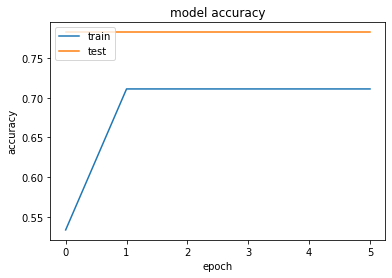

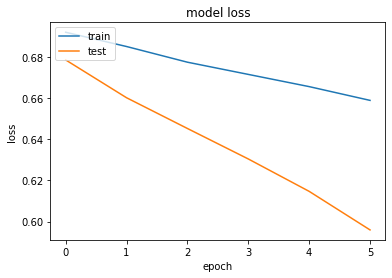

In [98]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### **Precision, recall and F-measure by using BERT**

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.88      0.88      0.88        25

    accuracy                           0.79        29
   macro avg       0.56      0.56      0.56        29
weighted avg       0.79      0.79      0.79        29

